# Connecting to drive and loading the modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Reading the dataset

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/intellihack-master/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/intellihack-master/test.csv')
print(train_df)
print('----------------------')
print(test_df.head())

        id      a     b  c  d      e       f     g        h  i
0     4453  Black  71.0  1  0  fluid  229.73  30.4     Good  0
1     1473  Black  49.0  1  0  solid  139.43  40.2   Normal  0
2     2119  Black  42.0  0  0  solid   68.24  33.1   Normal  0
3     3391  White  53.0  1  0  solid  240.86  31.9     Good  0
4     1000  Black  70.0  1  0  fluid   74.04  29.1     Good  0
...    ...    ...   ... .. ..    ...     ...   ...      ... ..
3572  1402  Black  57.0  0  0  fluid   85.99  21.2  Unknown  0
3573  2927  Black  15.0  0  0  solid  113.28  23.7     Good  0
3574  4937  White  62.0  1  0  solid  103.69  35.2    Worse  0
3575  3001  Black  33.0  0  0  fluid   91.53  38.8   Normal  0
3576  1387  White  37.0  0  0  fluid   98.12  27.5     Good  0

[3577 rows x 10 columns]
----------------------
     id      a     b  c  d      e       f     g        h
0   169  Black  81.0  0  0  fluid   91.54  31.4     Good
1  4022  White  81.0  1  0  solid  181.23  36.7     Good
2  4313  Black  57.0  0 

# Feature Engineering

## Categorical Encoding

In [ ]:
train_df["a"] = train_df["a"].astype('category')
train_df["e"] = train_df["e"].astype('category')
train_df["h"] = train_df["h"].astype('category')
print(train_df.dtypes)

test_df["a"] = test_df["a"].astype('category')
test_df["e"] = test_df["e"].astype('category')
test_df["h"] = test_df["h"].astype('category')
print(test_df.dtypes)

id       int64
a     category
b      float64
c        int64
d        int64
e     category
f      float64
g      float64
h     category
i        int64
dtype: object
id       int64
a     category
b      float64
c        int64
d        int64
e     category
f      float64
g      float64
h     category
dtype: object


In [ ]:
train_df["a"] = train_df["a"].cat.codes
train_df["e"] = train_df["e"].cat.codes
train_df["h"] = train_df["h"].cat.codes
print(train_df.head())

test_df["a"] = test_df["a"].cat.codes
test_df["e"] = test_df["e"].cat.codes
test_df["h"] = test_df["h"].cat.codes
print(test_df.head())

     id  a     b  c  d  e       f     g  h  i
0  4453  0  71.0  1  0  0  229.73  30.4  0  0
1  1473  0  49.0  1  0  1  139.43  40.2  1  0
2  2119  0  42.0  0  0  1   68.24  33.1  1  0
3  3391  2  53.0  1  0  1  240.86  31.9  0  0
4  1000  0  70.0  1  0  0   74.04  29.1  0  0
     id  a     b  c  d  e       f     g  h
0   169  0  81.0  0  0  0   91.54  31.4  0
1  4022  1  81.0  1  0  1  181.23  36.7  0
2  4313  0  57.0  0  0  1  134.76  29.1  2
3  1052  1  61.0  0  0  0   78.65  36.2  1
4  1100  1  67.0  0  0  1   68.61  31.9  0


## Imputation

In [ ]:
print(train_df.isnull().sum())
print('---------------------------')
print(test_df.isnull().sum())  

id      0
a       0
b       0
c       0
d       0
e       0
f       0
g     145
h       0
i       0
dtype: int64
---------------------------
id     0
a      0
b      0
c      0
d      0
e      0
f      0
g     56
h      0
dtype: int64


In [ ]:
train_df['g'].fillna((train_df['g'].mean()), inplace=True)
test_df['g'].fillna((test_df['g'].mean()), inplace=True)

print(train_df.isnull().sum())
print('---------------------------')
print(test_df.isnull().sum())  

id    0
a     0
b     0
c     0
d     0
e     0
f     0
g     0
h     0
i     0
dtype: int64
---------------------------
id    0
a     0
b     0
c     0
d     0
e     0
f     0
g     0
h     0
dtype: int64


In [ ]:
print(train_df.loc[(train_df['c'] != 1) & (train_df['c'] != 0)])
print(train_df.loc[(train_df['d'] != 1) & (train_df['d'] != 0)])

print('---------------------------------------------------------------')

print(test_df.loc[(test_df['c'] != 1) & (test_df['c'] != 0)])
print(test_df.loc[(test_df['d'] != 1) & (test_df['d'] != 0)])

Empty DataFrame
Columns: [id, a, b, c, d, e, f, g, h, i]
Index: []
Empty DataFrame
Columns: [id, a, b, c, d, e, f, g, h, i]
Index: []
---------------------------------------------------------------
Empty DataFrame
Columns: [id, a, b, c, d, e, f, g, h]
Index: []
Empty DataFrame
Columns: [id, a, b, c, d, e, f, g, h]
Index: []


## Handling Outliers



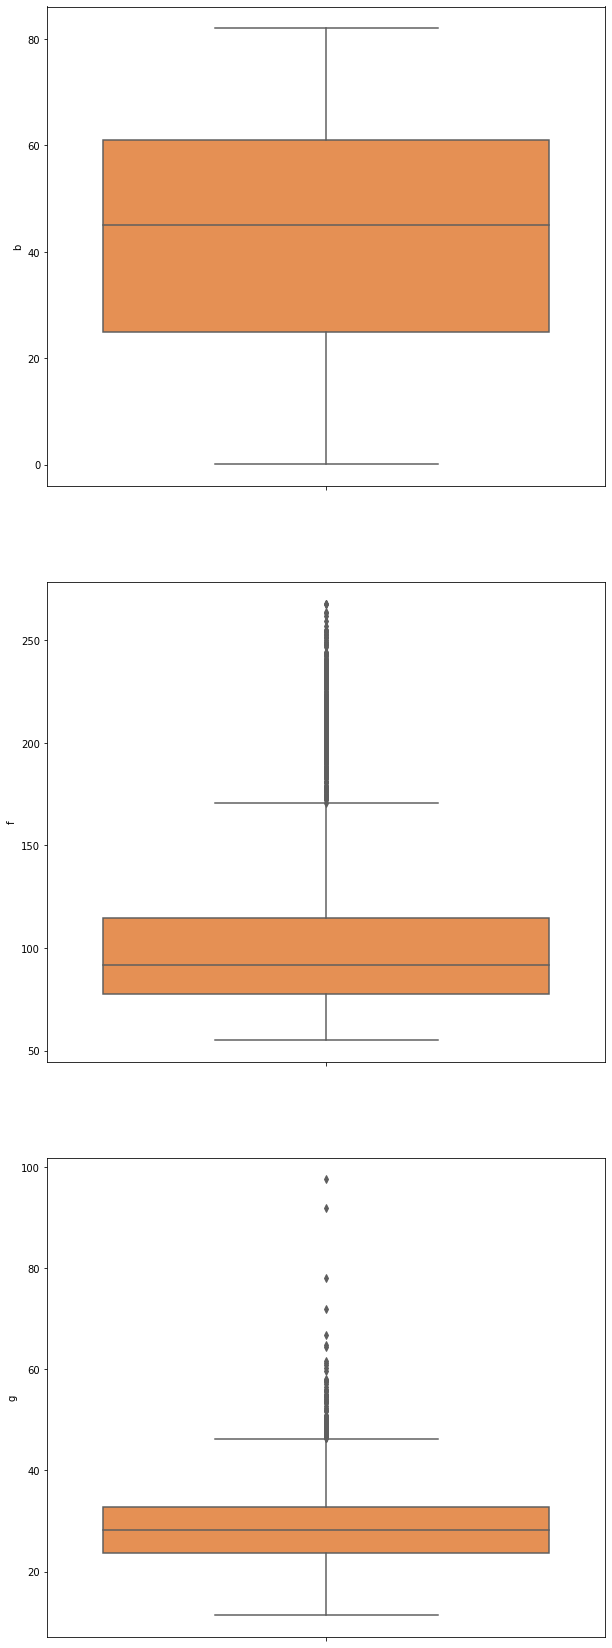

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=train_df,y="b",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=train_df,y="f",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=train_df,y="g",orient="v",ax=axes[2], palette="Oranges")

In [ ]:
factor = 4
upper_lim = train_df['b'].mean () + train_df['b'].std () * factor
lower_lim = train_df['b'].mean () - train_df['b'].std () * factor

train_df = train_df[(train_df['b'] < upper_lim) & (train_df['b'] > lower_lim)]

In [ ]:
upper_lim = train_df['f'].mean () + train_df['f'].std () * factor
lower_lim = train_df['f'].mean () - train_df['f'].std () * factor

train_df = train_df[(train_df['f'] < upper_lim) & (train_df['f'] > lower_lim)]

In [ ]:
upper_lim = train_df['g'].mean () + train_df['g'].std () * factor
lower_lim = train_df['g'].mean () - train_df['g'].std () * factor

train_df = train_df[(train_df['g'] < upper_lim) & (train_df['g'] > lower_lim)]
print(train_df)

        id  a     b  c  d  e       f     g  h  i
0     4453  0  71.0  1  0  0  229.73  30.4  0  0
1     1473  0  49.0  1  0  1  139.43  40.2  1  0
2     2119  0  42.0  0  0  1   68.24  33.1  1  0
3     3391  2  53.0  1  0  1  240.86  31.9  0  0
4     1000  0  70.0  1  0  0   74.04  29.1  0  0
...    ... ..   ... .. .. ..     ...   ... .. ..
3572  1402  0  57.0  0  0  0   85.99  21.2  2  0
3573  2927  0  15.0  0  0  1  113.28  23.7  0  0
3574  4937  2  62.0  1  0  1  103.69  35.2  3  0
3575  3001  0  33.0  0  0  0   91.53  38.8  1  0
3576  1387  2  37.0  0  0  0   98.12  27.5  0  0

[3566 rows x 10 columns]


## Spliting data & target

In [ ]:
train_dataset = train_df.values
test_dataset = test_df.values

train_data = train_dataset[:,1:9]
train_target = train_dataset[:,9]

test_data = test_dataset[:,1:9]

In [ ]:
print(train_data)
print('----------------------')
print(test_data)
print('----------------------')
print(train_target)

[[  0.    71.     1.   ... 229.73  30.4    0.  ]
 [  0.    49.     1.   ... 139.43  40.2    1.  ]
 [  0.    42.     0.   ...  68.24  33.1    1.  ]
 ...
 [  2.    62.     1.   ... 103.69  35.2    3.  ]
 [  0.    33.     0.   ...  91.53  38.8    1.  ]
 [  2.    37.     0.   ...  98.12  27.5    0.  ]]
----------------------
[[  0.    81.     0.   ...  91.54  31.4    0.  ]
 [  1.    81.     1.   ... 181.23  36.7    0.  ]
 [  0.    57.     0.   ... 134.76  29.1    2.  ]
 ...
 [  0.    49.     0.   ... 130.07  26.     0.  ]
 [  1.    28.     0.   ...  69.5   24.5    0.  ]
 [  1.    59.     0.   ...  60.64  20.     0.  ]]
----------------------
[0. 0. 0. ... 0. 0. 0.]


## Categorical Encoding

In [ ]:
from keras.utils import np_utils
train_target=np_utils.to_categorical(train_target)
print(train_target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler_data = MinMaxScaler()  
scaler_data.fit(train_data)

train_data_scaled=scaler_data.transform(train_data)
test_data_scaled=scaler_data.transform(test_data)

print(train_data_scaled)
print('-----------------------------')
print(test_data_scaled)

[[0.         0.86572266 1.         ... 0.82106056 0.3946281  0.        ]
 [0.         0.59716797 1.         ... 0.39617936 0.59710744 0.33333333]
 [0.         0.51171875 0.         ... 0.06121489 0.45041322 0.33333333]
 ...
 [1.         0.75585938 1.         ... 0.22801487 0.49380165 1.        ]
 [0.         0.40185547 0.         ... 0.17079942 0.56818182 0.33333333]
 [1.         0.45068359 0.         ... 0.2018068  0.33471074 0.        ]]
-----------------------------
[[0.         0.98779297 0.         ... 0.17084647 0.41528926 0.        ]
 [0.5        0.98779297 1.         ... 0.59285748 0.52479339 0.        ]
 [0.         0.69482422 0.         ... 0.37420599 0.3677686  0.66666667]
 ...
 [0.         0.59716797 0.         ... 0.35213852 0.30371901 0.        ]
 [0.5        0.34082031 0.         ... 0.06714346 0.27272727 0.        ]
 [0.5        0.71923828 0.         ... 0.02545523 0.17975207 0.        ]]


# model definition

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.8))  #newly added
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adaGrad',metrics=['accuracy'])
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1152      
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 dense_59 (Dense)            (None, 2)               

## model checkpoints

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/intellihack-master/models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

# model training

In [ ]:
model.fit(train_data_scaled,train_target,epochs=300, validation_split = 0.1, callbacks=[checkpoint])

Epoch 1/300
101/101 [==============================] - 3s 27ms/step - loss: 0.9451 - accuracy: 0.5235 - val_loss: 0.6837 - val_accuracy: 0.9328
Epoch 2/300
101/101 [==============================] - 6s 61ms/step - loss: 0.8842 - accuracy: 0.5700 - val_loss: 0.6768 - val_accuracy: 0.9524
Epoch 3/300
101/101 [==============================] - 3s 34ms/step - loss: 0.8377 - accuracy: 0.6064 - val_loss: 0.6730 - val_accuracy: 0.9552
Epoch 4/300
101/101 [==============================] - 2s 24ms/step - loss: 0.8155 - accuracy: 0.6510 - val_loss: 0.6698 - val_accuracy: 0.9552
Epoch 5/300
101/101 [==============================] - 3s 35ms/step - loss: 0.7861 - accuracy: 0.6821 - val_loss: 0.6671 - val_accuracy: 0.9552
Epoch 6/300
101/101 [==============================] - 2s 24ms/step - loss: 0.7835 - accuracy: 0.6762 - val_loss: 0.6648 - val_accuracy: 0.9552
Epoch 7/300
101/101 [==============================] - 3s 27ms/step - loss: 0.7694 - accuracy: 0.7230 - val_loss: 0.6628 - val_accuracy:

# Plotting

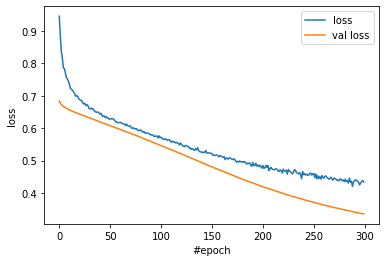

In [ ]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

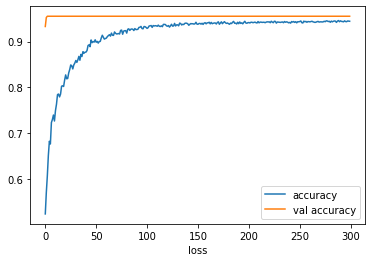

In [ ]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.show()

## Loading the best model

In [ ]:
from keras.models import load_model 

model=load_model('FFNN-iris.model')

OSError: ignored

# testing

In [ ]:
predicted_target=model.predict(test_data_scaled)
print(predicted_target)

In [ ]:
label=np.argmax(predicted_target, axis = 1)
print(label)

# Write to CSV

## Preparing

In [ ]:
indexes = np.array(test_dataset[:,0].reshape(-1,1), dtype = int)
label = np.array(label.reshape(-1,1), dtype = int)

print(indexes)
print('------------------')
print(label)

In [ ]:
print(np.size(indexes))
print(np.size(label))

In [ ]:
data_to_be_written = np.asarray(np.concatenate((indexes, label), axis = 1))
print(data_to_be_written)

## Writing

In [ ]:
final_df = pd.DataFrame(data=data_to_be_written, columns=['id', 'i'])

In [ ]:
final_df.to_csv('/content/drive/MyDrive/intellihack-master/submission.csv', index=False)